In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx

In [2]:
#load earthquake data from 1950-2020
locmag = pd.read_csv('./datasets/eq_data.csv')

# convert time to pandas datetime
locmag['time'] = pd.to_datetime(locmag['time'])

# read in faults
faults = geopandas.read_file('Qfaults/QFaults.shp')
faults = faults[(faults['age']=='latest Quaternary') & (faults['Location']=='California')].to_crs(epsg=3857)

#### Feature engineering

In [3]:
locmag['age'] = [(locmag['time'][0]-t).total_seconds()/86400 for t in locmag['time']]

#### Cluster model setup

In [5]:
df = locmag[locmag['mag']>=1][['longitude','latitude']]
big = locmag[locmag['mag']>=5]

In [6]:
ss = StandardScaler()
Z = ss.fit_transform(df)

In [15]:
km = KMeans(n_clusters=5,random_state=2020)
km.fit(Z)

KMeans(n_clusters=5, random_state=2020)

(array([ 5050.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         7342.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11643.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,  6324.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 14071.]),
 array([0.        , 0.11428571, 0.22857143, 0.34285714, 0.45714286,
        0.57142857, 0.68571429, 0.8       , 0.91428571, 1.02857143,
        1.14285714, 1.25714286, 1.37142857, 1.48571429, 1.6       ,
        1.71428571, 1.82857143, 1.94285714, 2.05714286, 2.17142857,
        2.28571429, 2.4       , 2.51428571, 2.62857143, 2.74285714,
        2.85714286, 2.97142857, 3.08571429, 3.2       , 3.31428571,
        3.42857143, 3.54285714, 3.65714286, 3.77142857, 3.88571429,
        4.        ]),
 <a list of 35 Patch objects>)

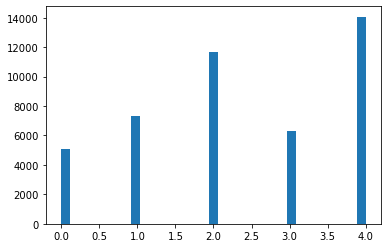

In [16]:
plt.hist(km.labels_,bins=35)

In [17]:
silhouette_score(Z,km.labels_)

0.4601678829390683

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

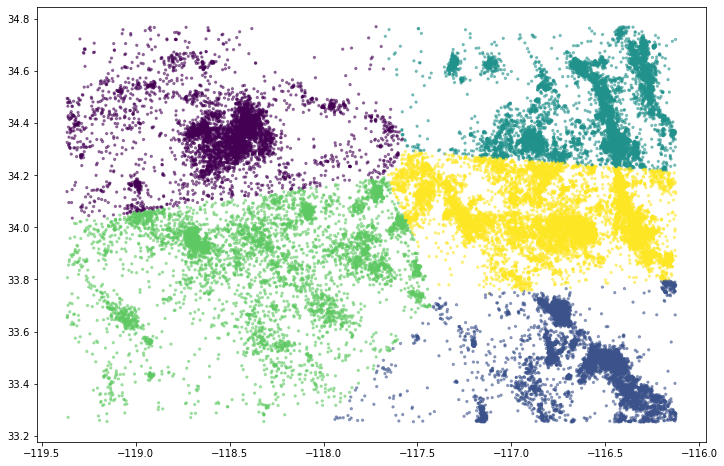

In [18]:
df['label'] = km.labels_
plt.figure(figsize=(12,8))
plt.scatter(df['longitude'],df['latitude'],c=df['label'],s=5,alpha=0.5)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],'w*',markersize=10)
plt.scatter(big['longitude'],big['latitude'],c='r',s=10)

print(labeled.shape)
print(unlabeled.shape)
print(f"{round((labeled.shape[0]/df.shape[0])*100,1)} percent of earthquakes occur in these {labeled['label'].value_counts().shape[0]} clusters")

/Users/Sam/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


(3927000.0, 4135000.0)

<Figure size 1008x720 with 0 Axes>

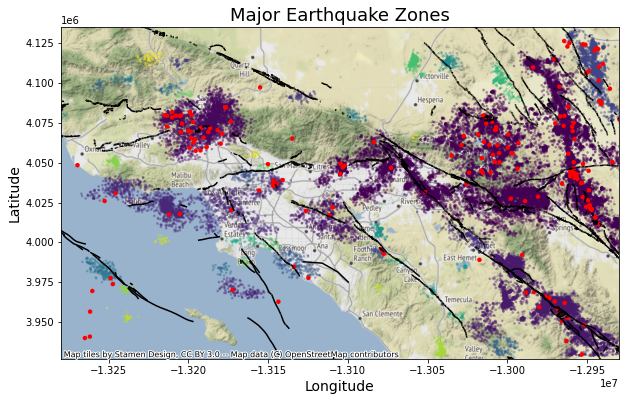

In [118]:
gdf = geopandas.GeoDataFrame(
    labeled, geometry=geopandas.points_from_xy(labeled.longitude, labeled.latitude))
gdf.crs = {'init' :'epsg:4326'}

locmag = geopandas.GeoDataFrame(
    locmag, geometry=geopandas.points_from_xy(locmag.longitude, locmag.latitude))
locmag.crs = {'init' :'epsg:4326'}

locmag = locmag.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)

plt.figure(figsize=(14,10))
base = gdf.plot(column='label',s=3,cmap='viridis',figsize=(10,10),alpha=0.3)
locmag[locmag['mag']>=4.5].plot(ax=base,marker='o',markersize=20,facecolor='r',edgecolor='None',label='Magnitude 5+')
plt.title('Major Earthquake Zones',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
ctx.add_basemap(base)
faults.plot(ax=base,color='k',label='Active Fault')
plt.xlim(-1.328e7,-1.293e7)
plt.ylim(3.927e6,4.135e6)

In [103]:
print(labeled.shape)
print(unlabeled.shape)
print(f"{round((labeled.shape[0]/dbs.labels_.shape[0])*100,1)} percent of earthquakes occur in these clusters")

(40893, 4)
(3537, 3)
92.0 percent of earthquakes occur in these clusters


#### Rescan residuals for smaller clusters

In [79]:
dbs2 = DBSCAN(eps = 0.05,min_samples=30)
dbs2.fit(unlabeled.drop(columns='label'))

DBSCAN(eps=0.05, min_samples=30)

0.11728974490515658


(array([2537.,  195.,   58.,  301., 1441.,  268.,   87.,  241.,  259.,
         231.,  451.,  196.,   33.,   90.,  109.,  393.,   45.,  280.,
         116.,   96.,   74.,   31.,   31.,   63.,   60.,   80.,   44.,
          49.,   60.,   88.,  136.,   48.,   59.,   53.,   98.]),
 array([-1.        ,  0.17142857,  1.34285714,  2.51428571,  3.68571429,
         4.85714286,  6.02857143,  7.2       ,  8.37142857,  9.54285714,
        10.71428571, 11.88571429, 13.05714286, 14.22857143, 15.4       ,
        16.57142857, 17.74285714, 18.91428571, 20.08571429, 21.25714286,
        22.42857143, 23.6       , 24.77142857, 25.94285714, 27.11428571,
        28.28571429, 29.45714286, 30.62857143, 31.8       , 32.97142857,
        34.14285714, 35.31428571, 36.48571429, 37.65714286, 38.82857143,
        40.        ]),
 <a list of 35 Patch objects>)

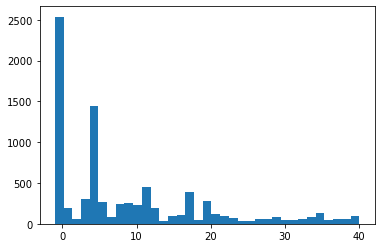

In [80]:
print(silhouette_score(unlabeled,dbs2.labels_))
plt.hist(dbs2.labels_,bins=35)

<ipython-input-83-687b65d1d60f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabeled['label2'] = dbs2.labels_


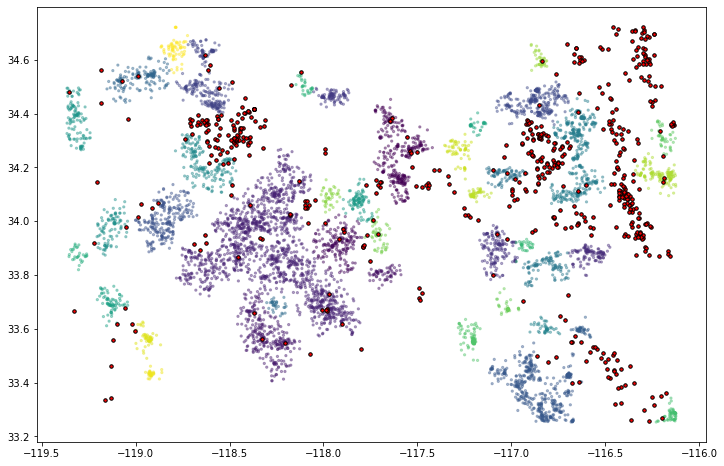

In [83]:
unlabeled['label2'] = dbs2.labels_
relabeled = unlabeled[unlabeled['label2']!=-1]
plt.figure(figsize=(12,8))
plt.scatter(relabeled['longitude'],relabeled['latitude'],c=relabeled['label2'],s=5,alpha=0.4)
plt.scatter(locmag[locmag['mag']>=4]['longitude'],locmag[locmag['mag']>=4]['latitude'],marker='o',facecolor='r',edgecolor='k',s=12)

/Users/Sam/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


(3927000.0, 4135000.0)

<Figure size 864x504 with 0 Axes>

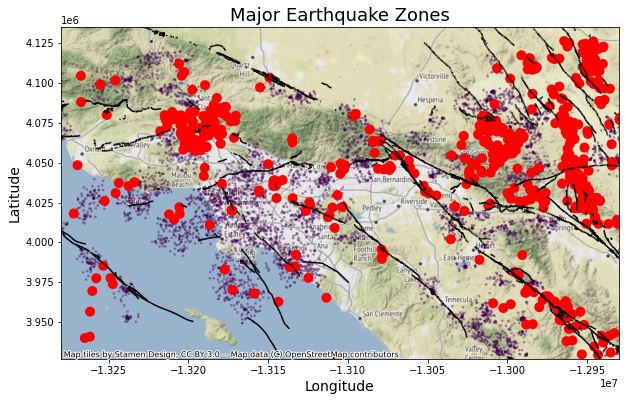

In [84]:
gdf2 = geopandas.GeoDataFrame(
    relabeled, geometry=geopandas.points_from_xy(relabeled.longitude, relabeled.latitude))
gdf2.crs = {'init' :'epsg:4326'}

gdf2 = gdf2.to_crs(epsg=3857)

plt.figure(figsize=(12,7))
base = gdf2.plot(column='label',s=3,cmap='viridis',figsize=(10,10),alpha=0.3)
locmag[locmag['mag']>=4].plot(ax=base,marker='o',markersize=100,facecolor='r',edgecolor='None',label='Magnitude 5+')
plt.title('Major Earthquake Zones',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
ctx.add_basemap(base)
faults.plot(ax=base,color='k',label='Active Fault')
plt.xlim(-1.328e7,-1.293e7)
plt.ylim(3.927e6,4.135e6)